In [1]:
import pandas as pd
import matplotlib.pyplot as plt

### Leitura

In [2]:
df = pd.read_csv('cancellation_prediction.csv')

In [3]:
#Tamanho da base
df.shape

(119390, 28)

In [4]:
#Contagem de nulos e listagem de colunas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 28 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   type                             119390 non-null  object 
 1   cancellation                     119390 non-null  int64  
 2   days_between_booking_arrival     119390 non-null  int64  
 3   year_arrival_date                119390 non-null  int64  
 4   month_arrival_date               119390 non-null  object 
 5   week_number_arrival_date         119390 non-null  int64  
 6   day_of_month_arrival_date        119390 non-null  int64  
 7   num_weekend_nights               119390 non-null  int64  
 8   num_workweek_nights              119390 non-null  int64  
 9   num_adults                       119390 non-null  int64  
 10  num_children                     119386 non-null  float64
 11  num_babies                       119390 non-null  int64  
 12  br

In [5]:
#Cabeçalho
pd.set_option('display.max_columns', None)
df.head()

,type,cancellation,days_between_booking_arrival,year_arrival_date,month_arrival_date,week_number_arrival_date,day_of_month_arrival_date,num_weekend_nights,num_workweek_nights,num_adults,num_children,num_babies,breakfast,country,market_segment,distribution_channel,repeated_guest,num_previous_cancellations,num_previous_stays,reserved_room,changes_between_booking_arrival,deposit_policy,id_travel_agency_booking,id_person_booking,customer_type,avg_price,required_car_parking_spaces,total_of_special_requests
0,Fancy Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,True,PRT,0,0,0,0,0,C,3,No Deposit,NaN,NaN,0,0.0,0,0
1,Fancy Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,True,PRT,0,0,0,0,0,C,4,No Deposit,NaN,NaN,0,0.0,0,0
2,Fancy Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,True,GBR,0,0,0,0,0,A,0,No Deposit,NaN,NaN,0,75.0,0,0
3,Fancy Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,True,GBR,1,1,0,0,0,A,0,No Deposit,304.0,NaN,0,75.0,0,0
4,Fancy Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,True,GBR,2,2,0,0,0,A,0,No Deposit,240.0,NaN,0,98.0,0,1


### Tratamento e Criação de Novas Variáveis

In [6]:
#Convertendo string de mes para numero e criando dummies
df['month_arrival_date'] = pd.to_datetime(df.month_arrival_date , format='%B').dt.quarter
dummies_month_arrival = pd.get_dummies(df['month_arrival_date']).rename(columns={1:'dummy_quarter_1',
                                                        2:'dummy_quarter_2',
                                                        3:'dummy_quarter_3',
                                                        4:'dummy_quarter_4',}).drop('dummy_quarter_4',axis=1)

df = pd.concat([df, dummies_month_arrival], axis=1).drop('month_arrival_date', axis=1)

#Transformando variavel de dia do mes e criando dummies
df.loc[df['day_of_month_arrival_date'] <= 10, 'day_of_month_arrival_date'] = 1
df.loc[(df['day_of_month_arrival_date'] > 10) & (df['day_of_month_arrival_date'] <= 20), 'day_of_month_arrival_date'] = 2
df.loc[(df['day_of_month_arrival_date'] > 20) & (df['day_of_month_arrival_date'] <= 31), 'day_of_month_arrival_date'] = 3
dummy_day_arrival = pd.get_dummies(df['day_of_month_arrival_date']).rename(columns={1:'dummy_start_month',
                                                        2:'dummy_middle_month',
                                                        3:'dummy_end_month'}).drop('dummy_end_month',axis=1)
df = pd.concat([df, dummy_day_arrival], axis=1).drop('day_of_month_arrival_date', axis=1)


#Convertendo breakfast para 0 e 1
df['breakfast'] = df['breakfast']*1

#Criacao dummy de tipo de hotel
df['dummy_fancyhotel'] = pd.get_dummies(df['type']).rename(columns={'Fancy Hotel':'dummy_fancy_hotel'}).drop('Hotel',axis=1)
df = df.drop('type',axis= 1)

#Criacao dummies de tipo de deposito
dummies_deposit_policy = pd.get_dummies(df['deposit_policy']).rename(columns={'Non Refund':'dummy_no_refund','No Deposit':'dummy_no_deposit'}).drop('Refundable',axis=1)
df = pd.concat([df, dummies_deposit_policy], axis=1).drop('deposit_policy', axis=1)

#Criacao dummies de tipo de quarto
dummies_reserved_room = pd.get_dummies(df['reserved_room']).rename(columns={'A':'dummy_reserved_room_A'})
df = pd.concat([df, dummies_reserved_room[['dummy_reserved_room_A']]], axis=1).drop('reserved_room', axis=1)

#Criacao dummies de ano de entrada
dummies_year_arrival = pd.get_dummies(df['year_arrival_date']).rename(columns={2017:'dummy_year_arrival_2017',
                                                                               2016:'dummy_year_arrival_2016',
                                                                               2015:'dummy_year_arrival_2015',}).drop('dummy_year_arrival_2015',axis=1)
df = pd.concat([df, dummies_year_arrival], axis=1).drop('year_arrival_date', axis=1)

#Criando dummies de segmento de mercado
dummies_market_segment = pd.get_dummies(df['market_segment']).rename(columns={2:'dummy_msegment_2',
                                                        3:'dummy_msegment_3',
                                                        5:'dummy_msegment_5',
                                                        0:'dummy_msegment_0',}).drop([1,4,6,7],axis=1)

df = pd.concat([df, dummies_market_segment], axis=1).drop('market_segment', axis=1)

#Criando dummies de canal de distribuicao
dummies_distribution_channel = pd.get_dummies(df['distribution_channel']).rename(columns={0:'dummy_dchannel_0',
                                                        1:'dummy_dchannel_1',
                                                        2:'dummy_dchannel_2',
                                                        4:'dummy_dchannel_4',}).drop([3],axis=1)
df = pd.concat([df, dummies_distribution_channel], axis=1).drop('distribution_channel', axis=1)

#Transformando variavel de indicador de reserva por agencia
df.loc[df['id_travel_agency_booking'] > 0, 'id_travel_agency_booking'] = 1
df['id_travel_agency_booking'] = df['id_travel_agency_booking'].fillna(0)

#Transformando variavel de indicador de reserva por terceiro
df.loc[df['id_person_booking'] > 0, 'id_person_booking'] = 1
df['id_person_booking'] = df['id_person_booking'].fillna(0)


#Criando dummies de tipo de cliente
dummies_customer_type = pd.get_dummies(df['customer_type']).rename(columns={0:'dummy_customer_type_0',
                                                        1:'dummy_customer_type_1',
                                                        2:'dummy_customer_type_2',
                                                        3:'dummy_customer_type_3',}).drop('dummy_customer_type_3',axis=1)
df = pd.concat([df, dummies_customer_type], axis=1).drop('customer_type', axis=1)

#Removendo informações nulas
df = df[~df['num_children'].isnull()].copy()

#Removendo variáveis desconsideradas

df = df.drop(['country','week_number_arrival_date'],axis= 1)

In [7]:
#Correlação simples
df.corr()['cancellation'].sort_values()

#Traz poucas respostas

dummy_no_deposit                  -0.477942
total_of_special_requests         -0.234706
required_car_parking_spaces       -0.195492
dummy_msegment_0                  -0.154420
dummy_dchannel_0                  -0.151609
changes_between_booking_arrival   -0.144371
dummy_fancyhotel                  -0.136505
dummy_customer_type_2             -0.124231
id_person_booking                 -0.099302
repeated_guest                    -0.084788
dummy_dchannel_1                  -0.075420
num_previous_stays                -0.057355
dummy_quarter_1                   -0.050373
num_babies                        -0.032488
dummy_msegment_3                  -0.028451
dummy_customer_type_1             -0.023663
dummy_year_arrival_2016           -0.023168
dummy_dchannel_4                  -0.014889
dummy_msegment_2                  -0.006269
num_weekend_nights                -0.001783
dummy_middle_month                 0.001750
num_children                       0.005048
dummy_start_month               

In [8]:
#37% de cancelamentos no período
df['cancellation'].value_counts(normalize=True)

0    0.629605
1    0.370395
Name: cancellation, dtype: float64

In [9]:
#Base de reservas canceladas para investigação
df_cancel = df[df['cancellation']==1].copy()

#Base de reservas não canceladas para investigação
df_n_cancel = df[~(df['cancellation']==1)].copy()

In [10]:
#Sumário para primeiras impressões sobre as reservas canceladas
df_cancel.describe()

,cancellation,days_between_booking_arrival,num_weekend_nights,num_workweek_nights,num_adults,num_children,num_babies,breakfast,repeated_guest,num_previous_cancellations,num_previous_stays,changes_between_booking_arrival,id_travel_agency_booking,id_person_booking,avg_price,required_car_parking_spaces,total_of_special_requests,dummy_quarter_1,dummy_quarter_2,dummy_quarter_3,dummy_start_month,dummy_middle_month,dummy_fancyhotel,dummy_no_deposit,dummy_no_refund,dummy_reserved_room_A,dummy_year_arrival_2016,dummy_year_arrival_2017,dummy_msegment_0,dummy_msegment_2,dummy_msegment_3,dummy_msegment_5,dummy_dchannel_0,dummy_dchannel_1,dummy_dchannel_2,dummy_dchannel_4,dummy_customer_type_0,dummy_customer_type_1,dummy_customer_type_2
count,44220.0,44220.000000,44220.000000,44220.000000,44220.000000,44220.000000,44220.000000,44220.000000,44220.000000,44220.000000,44220.000000,44220.000000,44220.00000,44220.000000,44220.000000,44220.0,44220.000000,44220.000000,44220.000000,44220.000000,44220.000000,44220.000000,44220.000000,44220.000000,44220.000000,44220.000000,44220.000000,44220.000000,44220.000000,44220.000000,44220.000000,44220.000000,44220.000000,44220.000000,44220.000000,44220.000000,44220.000000,44220.000000,44220.000000
mean,1.0,144.861646,0.925283,2.561940,1.901696,0.106513,0.003822,0.780326,0.012483,0.208367,0.025124,0.098349,0.90891,0.026934,104.797857,0.0,0.328743,0.173044,0.310629,0.318702,0.327951,0.336251,0.251515,0.671416,0.327770,0.760516,0.459905,0.356061,0.043713,0.468973,0.187947,0.273564,0.057825,0.033333,0.908005,0.000837,0.825735,0.028539,0.144392
std,0.0,118.622518,1.007482,1.878301,0.678048,0.411352,0.062432,0.414031,0.111029,1.332405,0.678972,0.451027,0.28774,0.161891,45.869975,0.0,0.649191,0.378289,0.462756,0.465978,0.469472,0.472431,0.433889,0.469704,0.469406,0.426774,0.498395,0.478839,0.204459,0.499042,0.390674,0.445793,0.233414,0.179508,0.289022,0.028914,0.379342,0.166509,0.351490
min,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.0,48.000000,0.000000,1.000000,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.00000,0.000000,72.450000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
50%,1.0,113.000000,1.000000,2.000000,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.00000,0.000000,96.220000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
75%,1.0,214.000000,2.000000,3.000000,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.00000,0.000000,127.627500,0.0,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
max,1.0,629.000000,16.000000,40.000000,55.000000,10.000000,2.000000,1.000000,1.000000,26.000000,58.000000,16.000000,1.00000,1.000000,300.000000,0.0,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


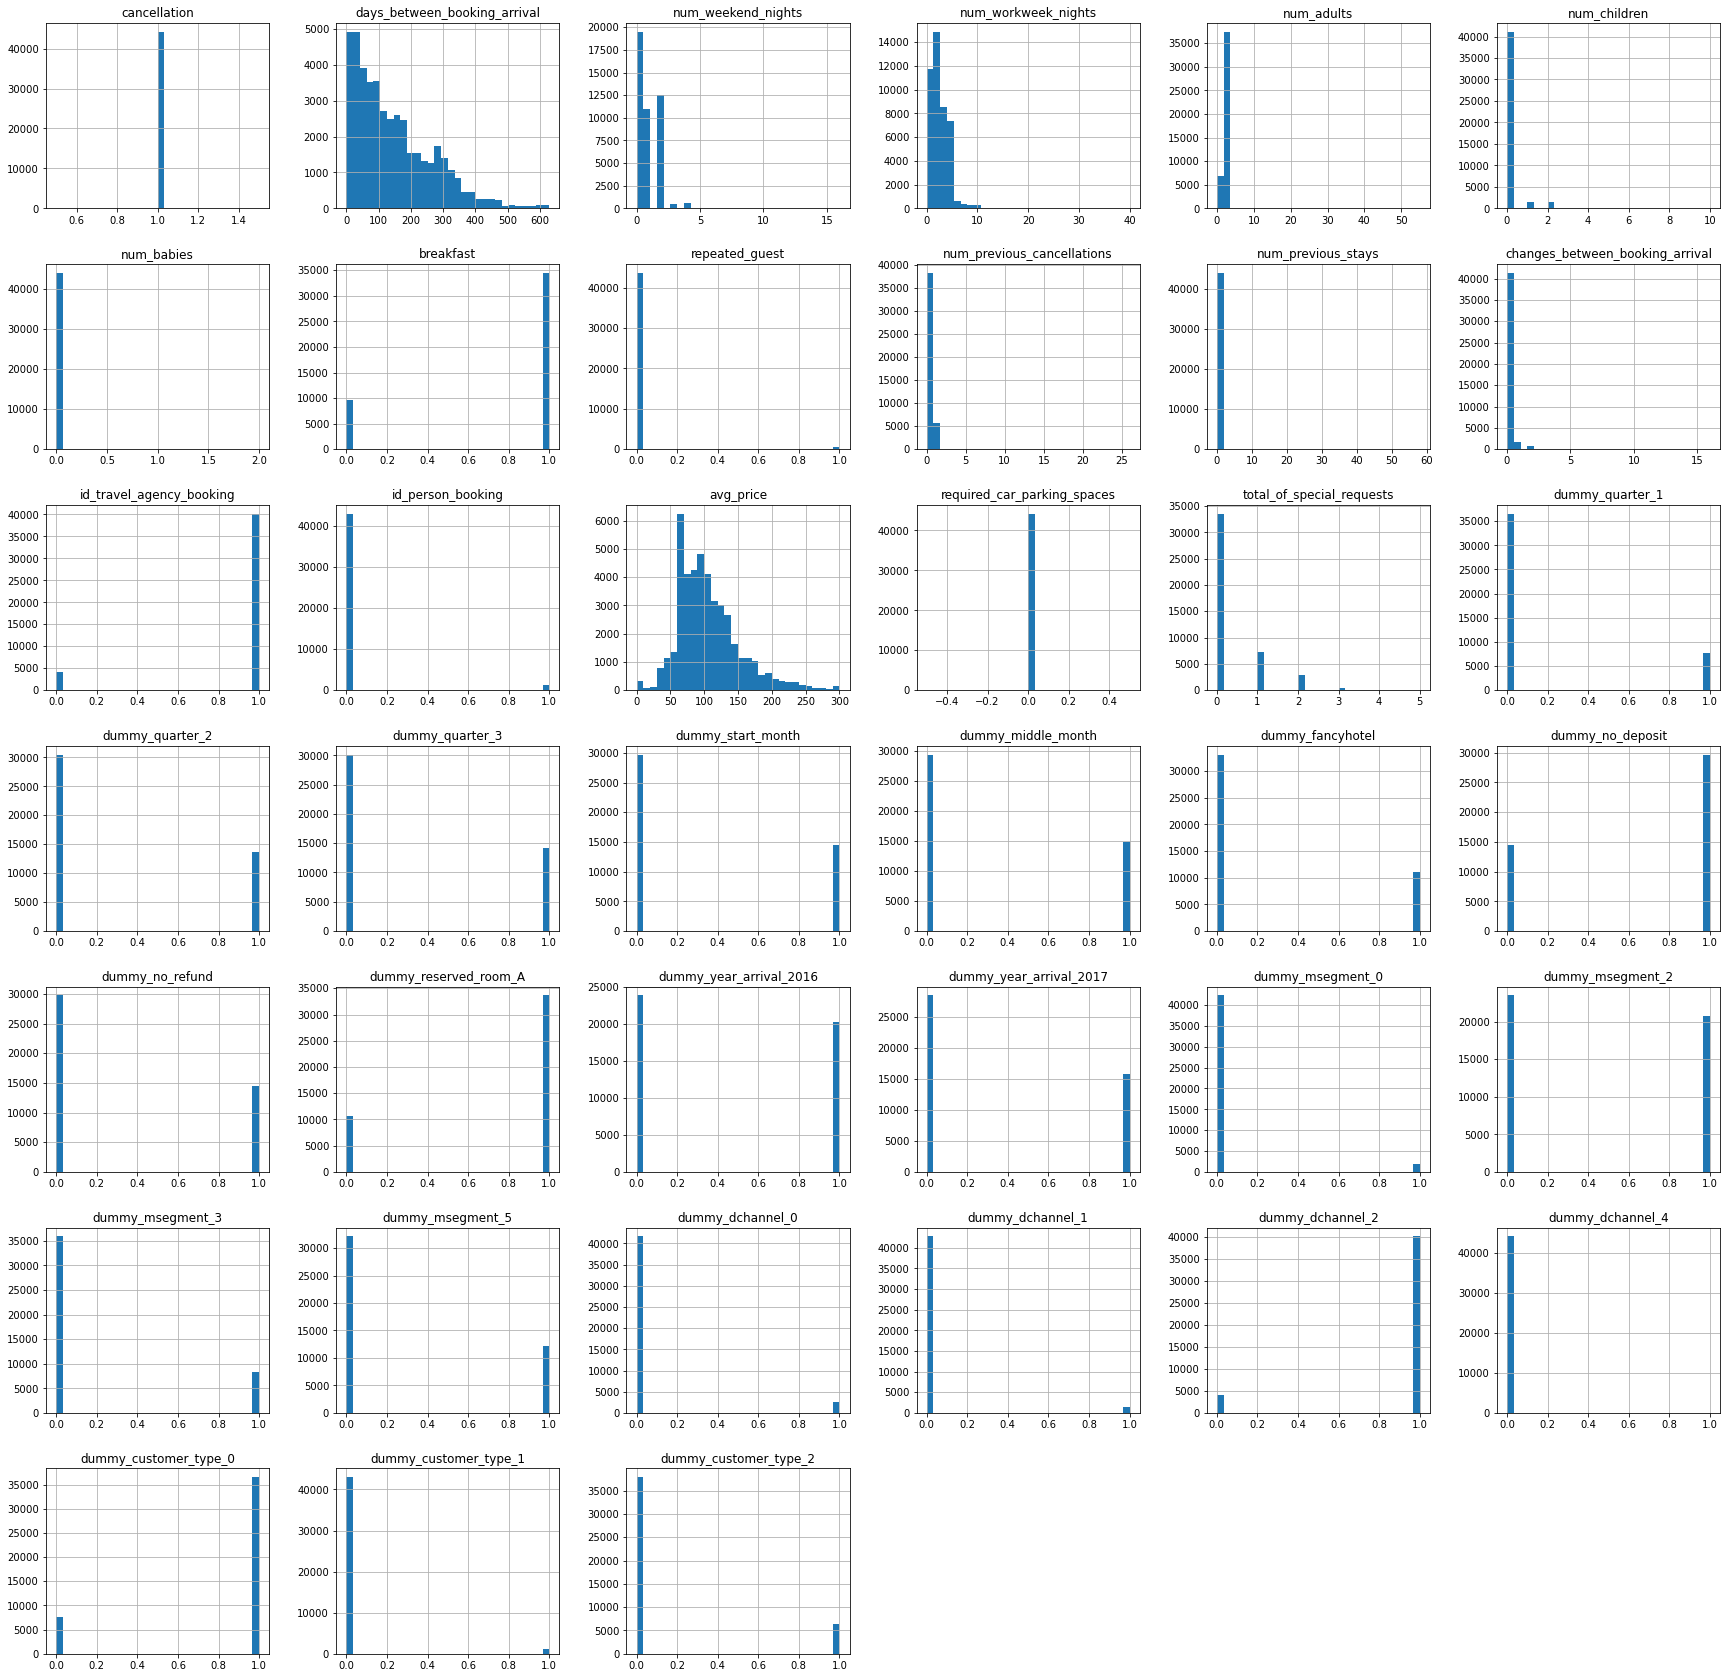

In [11]:
#Histograma 
df_cancel.hist(bins=30, figsize=(30, 30));

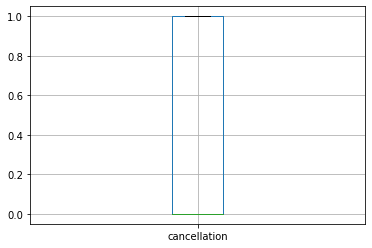

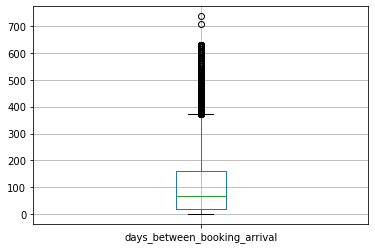

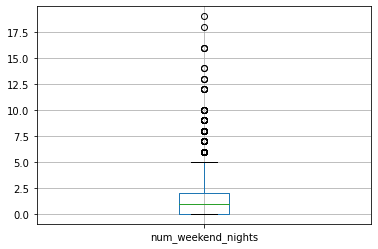

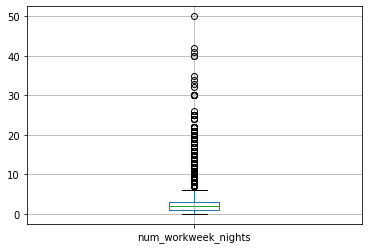

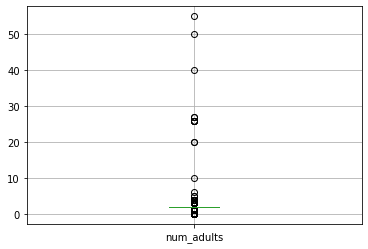

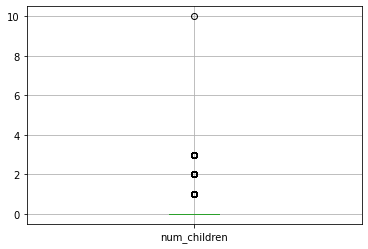

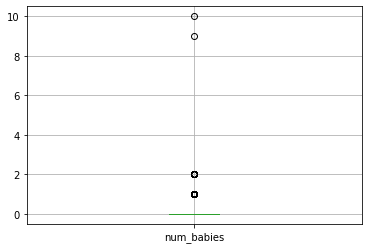

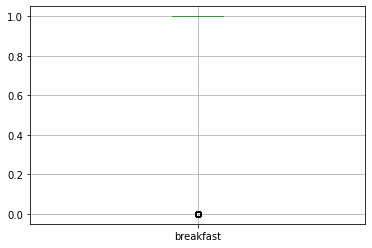

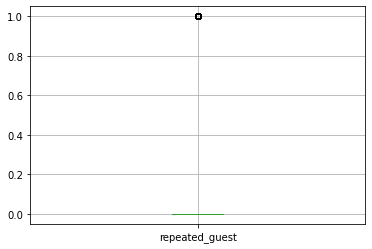

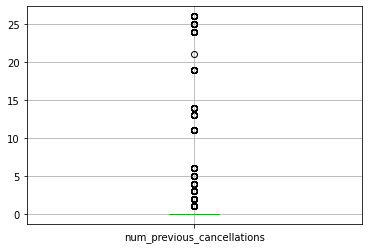

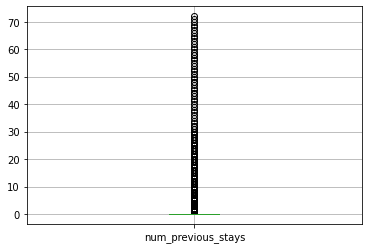

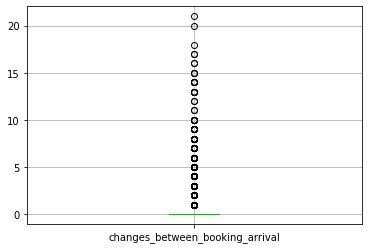

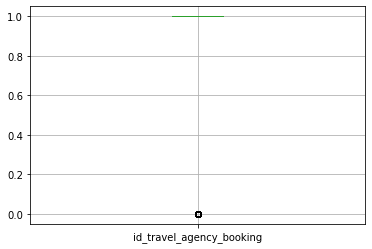

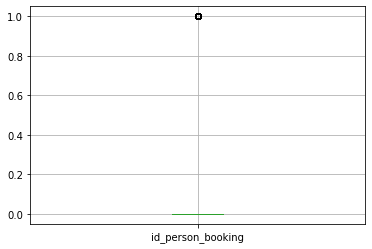

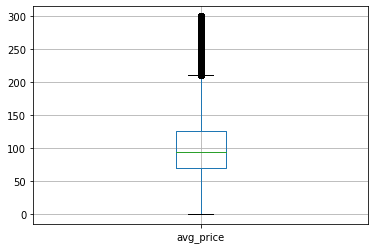

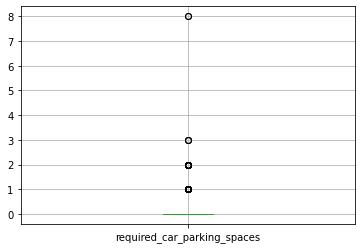

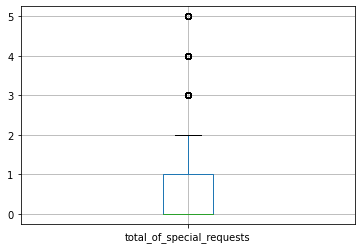

In [12]:
# Plotar um boxplot para analisar presença de outliers no dataset
for column in df.columns[~pd.Series(df.columns).str.startswith('dummy',na=False)]:
    plt.figure()
    df.boxplot([column])

#### Hipótese Preliminar 1: Pessoas cancelam mais reservas que foram feitas com antecedência


In [13]:
#Mediana de dias de antecedência para reservas bem sucedidas
df_n_cancel['days_between_booking_arrival'].median()

45.0

In [14]:
#Mediana de dias de antecedência para reservas canceladas
df_cancel['days_between_booking_arrival'].median()

113.0

In [15]:
#Dias de antecedência em média para reservas bem sucedidas
df_n_cancel['days_between_booking_arrival'].mean()

79.98468722560732

In [16]:
#Dias de antecedência em média para reservas canceladas
df_cancel['days_between_booking_arrival'].mean()

144.86164631388513

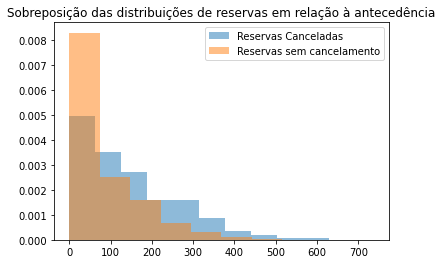

In [17]:
plt.hist(df_cancel['days_between_booking_arrival'], density=True,
         alpha=0.5, # transparencia
         label='Reservas Canceladas')
  
plt.hist(df_n_cancel['days_between_booking_arrival'],density=True,
         alpha=0.5,
         label='Reservas sem cancelamento')
  
plt.legend(loc='upper right')
plt.title('Sobreposição das distribuições de reservas em relação à antecedência')
plt.show()

As métricas apresentadas e a sobreposição das distribuições são evidências a favor da hipótese levantada

#### Hipótese Preliminar 2: Pessoas cancelam reservas mais caras


In [18]:
#Mediana de dias de antecedência para reservas bem sucedidas
df_n_cancel['avg_price'].median()

92.5

In [19]:
#Mediana de dias de antecedência para reservas canceladas
df_cancel['avg_price'].median()

96.22

In [20]:
#Dias de antecedência em média para reservas bem sucedidas
df_n_cancel['avg_price'].mean()

99.911145464702

In [21]:
#Dias de antecedência em média para reservas canceladas
df_cancel['avg_price'].mean()

104.79785662595802

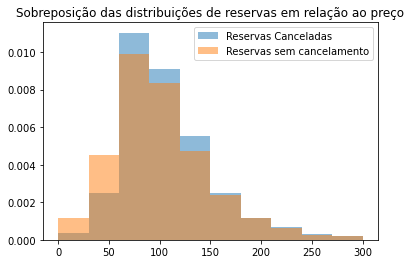

In [22]:
plt.hist(df_cancel['avg_price'], density=True,
         alpha=0.5, # transparencia
         label='Reservas Canceladas')
  
plt.hist(df_n_cancel['avg_price'],density=True,
         alpha=0.5,
         label='Reservas sem cancelamento')
  
plt.legend(loc='upper right')
plt.title('Sobreposição das distribuições de reservas em relação ao preço')
plt.show()

Não há evidências a favor da hipótese levantada nesse primeiro momento. As métricas e distribuições são muito similares.

## Modelagem

In [23]:
#pip install xgboost

In [24]:
# carregando as bibliotecas necessárias 
from IPython.core.display import display, HTML
from xgboost import XGBClassifier
import seaborn as sns



# Ignorar warnings
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline


C:\Users\bruno\AppData\Local\Temp\ipykernel_19432\2733300603.py:2: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [25]:
# contagem da classe alvo
contagem = df['cancellation'].value_counts()
print(f"Reservas bem sucedidas: {contagem[0]}")
print(f"Reservas canceladas: {contagem[1]}")

Reservas bem sucedidas: 75166
Reservas canceladas: 44220


In [26]:
# tirando uma cópia para preservar o DataFrame original
df_copia = df.copy()

# definindo os recuros de entrada(X) e saida(y) 
X = df_copia.iloc[: , 1:]
y = df_copia.iloc[ : , 0]

In [27]:
# separando os dados de treino e teste
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.30, 
                                                    shuffle=True, 
                                                    random_state = 0)

# verificando a dimensão dos dados de treino e teste
print(f'Dados para Treino: {X_train.shape[0]} amostras')
print(f'Dados para Teste: {X_test.shape[0]} amostras')

Dados para Treino: 83570 amostras
Dados para Teste: 35816 amostras


In [28]:
# instala a biblioteca para balanceamento
#! pip install imbalanced-learn



In [29]:
from imblearn.over_sampling import SMOTE
from collections import Counter

# executa o balanceamento usando a técnica SMOTE
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

# realiza a contagem das classes
contagem = Counter(y)
print(contagem)

Counter({0: 75166, 1: 75166})


In [30]:
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier

# Divisão entre bases de treino e validação balanceadas
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

# Objeto para declaração de parâmetros
params = {
            'objective':'binary:logistic',
            'max_depth': 10,
            'alpha': 10,
            'learning_rate': 0.1,
            'n_estimators':300
        }         
           
          
# Instância do modelo 
xgb_clf = XGBClassifier(**params)


# Ajuste do modelo aos datasets de treino
xgb_clf.fit(X_train, y_train)

XGBClassifier(alpha=10, base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=10, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=300,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=10, ...)

In [31]:
#Predição
y_pred = xgb_clf.predict(X_test)

In [32]:
from sklearn.metrics import accuracy_score

print('Acurácia do modelo XGBoost: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Acurácia do modelo XGBoost: 0.8700


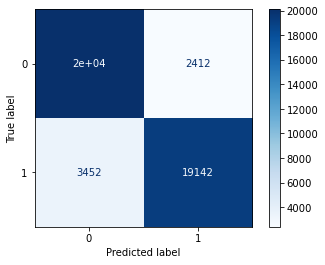

In [33]:
# Matriz de Confusão
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(xgb_clf, X_test, y_test, cmap='Blues')

In [34]:
# Relatório da Classificação
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87     22506
           1       0.89      0.85      0.87     22594

    accuracy                           0.87     45100
   macro avg       0.87      0.87      0.87     45100
weighted avg       0.87      0.87      0.87     45100



Todas estas principais métricas de avaliação estão dentro de intervalos satisfatórios, especialmente a nível de mercado

In [35]:
#Validação Cruzada com 5 dobras

from xgboost import cv
import xgboost as xgb

data_dmatrix = xgb.DMatrix(data=X,label=y)

params = {"objective":"binary:logistic",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 10, 'alpha': 10}

xgb_cv = cv(dtrain=data_dmatrix, params=params, nfold=5,
                    num_boost_round=300, early_stopping_rounds=10, metrics="auc", as_pandas=True, seed=123)

In [36]:
# Média de todos os rounds
xgb_cv.mean()



train-auc-mean    0.935631
train-auc-std     0.001245
test-auc-mean     0.928138
test-auc-std      0.002067
dtype: float64

A métrica de área abaixo da curva, em média, apresentou bons resultados (próximo de 1.0)

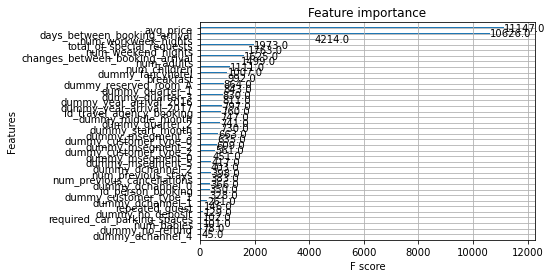

In [37]:
#Feature Importance
xgb.plot_importance(xgb_clf)
plt.rcParams["figure.figsize"] = (20,10)
plt.show()

Aqui três variáveis se destacam, Preço médio, Dias de antecedência e Número de dias úteis na reserva

### Nova modelagem agora utilizando os anos de 2015 e 2016 como treino e 2017 como validação

In [38]:
# Nova definição de entrada(X) e saida(y)


X_train2 = df_copia[~(df_copia['dummy_year_arrival_2017'] == 1)].drop(['dummy_year_arrival_2016','dummy_year_arrival_2017'],axis=1).iloc[: , 1:]#.values
X_test2 = df_copia[df_copia['dummy_year_arrival_2017'] == 1].drop(['dummy_year_arrival_2016','dummy_year_arrival_2017'],axis=1).iloc[ : , 1:]#.values

y_train2 = df_copia[~(df_copia['dummy_year_arrival_2017'] == 1)].drop(['dummy_year_arrival_2016','dummy_year_arrival_2017'],axis=1).iloc[: , 0]#.values
y_test2 = df_copia[df_copia['dummy_year_arrival_2017'] == 1].drop(['dummy_year_arrival_2016','dummy_year_arrival_2017'],axis=1).iloc[ : , 0]#.values

In [39]:
# Verificando a dimensão dos dados de treino e teste
print(f'Dados para Treino: {X_train2.shape[0]} amostras')
print(f'Dados para Teste: {X_test2.shape[0]} amostras')

Dados para Treino: 78699 amostras
Dados para Teste: 40687 amostras


In [40]:
# Parâmetros
params = {
            'objective':'binary:logistic',
            'max_depth': 10,
            'alpha': 10,
            'learning_rate': 0.1,
            'n_estimators':300
        }         
           
          
# Instância do modelo
xgb_clf2 = XGBClassifier(**params)


# fit the classifier to the training data
xgb_clf2.fit(X_train2, y_train2)

XGBClassifier(alpha=10, base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=10, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=300,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=10, ...)

In [41]:
y_pred2 = xgb_clf2.predict(X_test2)

In [42]:
from sklearn.metrics import accuracy_score

print('Nova acurácia: {0:0.4f}'. format(accuracy_score(y_test2, y_pred2)))

Nova acurácia: 0.7708


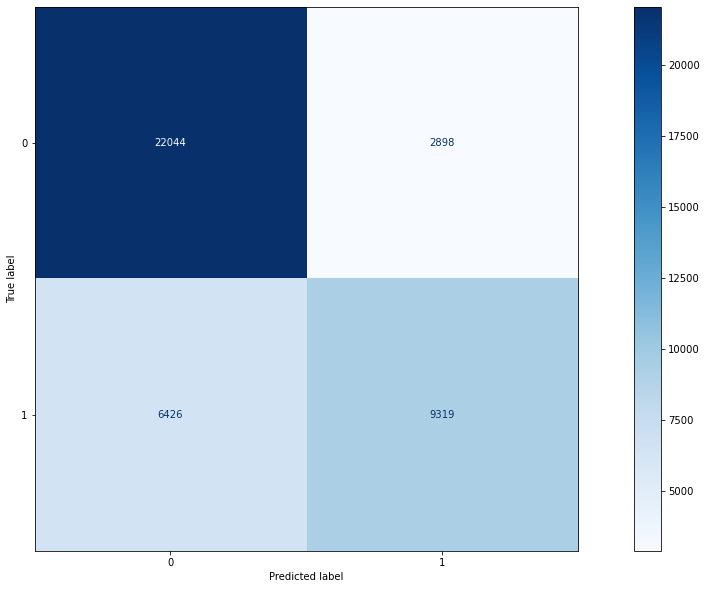

In [43]:
# Matriz de Confusão
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(xgb_clf2, X_test2, y_test2, cmap='Blues')

In [44]:
# Relatório da Classificação
from sklearn.metrics import classification_report
print(classification_report(y_test2, y_pred2))

              precision    recall  f1-score   support

           0       0.77      0.88      0.83     24942
           1       0.76      0.59      0.67     15745

    accuracy                           0.77     40687
   macro avg       0.77      0.74      0.75     40687
weighted avg       0.77      0.77      0.76     40687



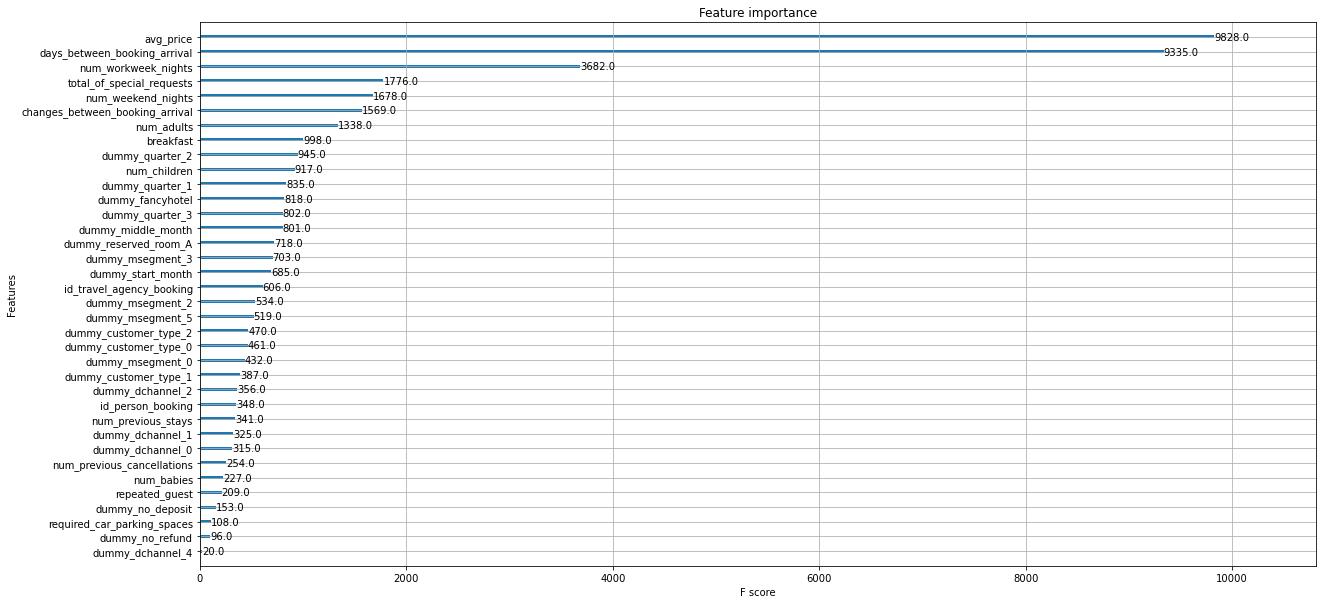

In [45]:
#Feature Importance
xgb.plot_importance(xgb_clf2)
plt.rcParams["figure.figsize"] = (20,10)
plt.show()

#### Conclusão:

Apesar do segundo modelo considerar as mesmas variáveis como destaque em relação à importância, nota-se que o primeiro modelo apresentou
todos os indicadores de performance em níveis superiores, utilizando os mesmos parâmetros. 
Vale ressaltar que tal diferença pode também ter sido impactada pela ausência de balanceamento no segundo modelo.
